# Image Information

The main objectives of this module are:

* Manipulate an image with Python, scikit-image and numpy.
* Process images at the pixel level.
* Compute and understand image histograms.
* Understand lossless compression & reconstruction.
* Understand the co-occurrence matrix.
* Use different colour representations.

## 1. Read & write an image

In this exercise, we will simply open an image file, display it, and save a copy. 

**Use the [scikit-image io](https://scikit-image.org/docs/dev/api/skimage.io.html) module to open, show & save a copy of the "camera.jpg"**

*Note: we use the **%matplotlib inline** command to display the image in the notebook. It would not be necessary if you execute the code in the terminal or in a standard IDE like PyCharm.*

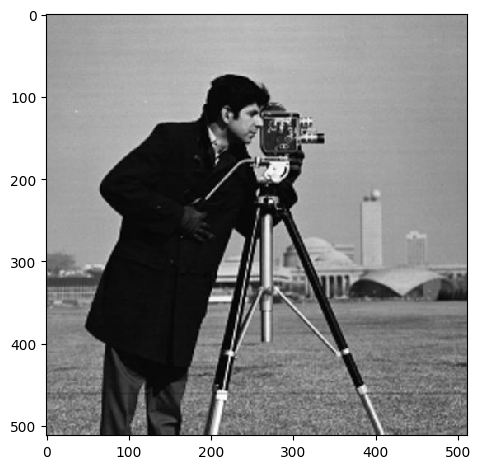

In [1]:
from skimage.io import imread, imsave, imshow
%matplotlib inline
## -- Your code here -- ##
img = imread('camera.jpg')
imsave('camera2.jpg', img)
imshow(img)

**Try the same with "view.jpg"**

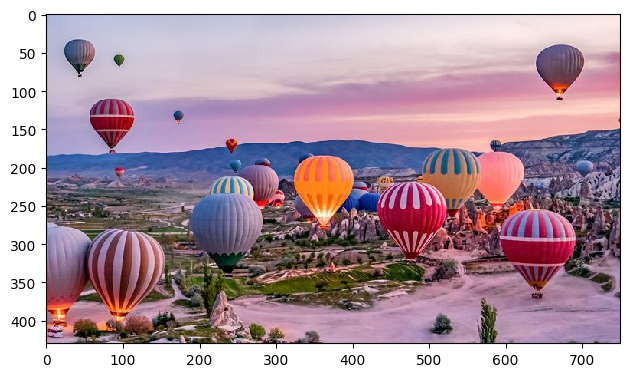

In [2]:
## -- Your code here -- ##
img2=imread("view.jpg")
imsave("view2.jpg",img2)
imshow(img2)

When you open an image with scikit-image, it is stored as a Numpy [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object. Numpy arrays are objects which can be easily manipulated for numerical computations.

**Using *ndarray* methods & attributes, answer the following questions about the "camera" and "view" images:**

1. What is the shape of the image? (width & height)
1. What is the minimum pixel value? What is the maximum pixel value?
1. What is the data type for each pixel?


In [3]:
import numpy as np

## -- Your code here -- ##
#1
img1=imread("camera.jpg")
img2=imread("view.jpg")
shape1=img1.shape #get the width and height of the image
shape2=img2.shape
print(shape1)
print(shape2)

#2
print("maximum value pixel :",img1.max())
print("minimum value pixel :",img1.min())

#3
print("data type for each pixel (camera.jpg) :",img1.dtype)
print("data type for each pixel (view.jpg) :",img2.dtype)


(512, 512)
(430, 750, 3)
maximum value pixel : 255
minimum value pixel : 0
data type for each pixel (camera.jpg) : uint8
data type for each pixel (view.jpg) : uint8


Note the difference in image shape between a camera.jpg and an view.jpg. The shape of the ndarray show the layers of the matrix. The first two numbers are length and width, and the third number (i.e. 3 in view.jpg) is for three layers: Red, Green, Blue. So, camera.jpg has only one channel making it a greyscale image and view.jpg an RGB image. 

The data type of pixel value is the same for both the images - uint8 which means that the value of each pixel is an 8-bit unsigned integer and the value cannot be outside of the 0 to 255 range.
For a grey scale image 0 corresponds to black pixel value and 255 to white pixel value and the numbers in between have correspond to varying shades of grey.
The red, green and blue use 8 bits each, which have integer values from 0 to 255. This makes 256x256x256=16777216 possible colors.

The actual information that is stored in an image is the "value" of each pixel. With the above information, try to show the pixel values at different spots in the images, for example the camera's coat, sky in both the images, and the hot air balloon from view.jpg.
Also try to show only a 100x100 pixels window taken at the center of the image, head of the cameraman and a single hot air balloon.

In [4]:
## -- Your code here -- ##
img1=imread("camera.jpg")
img2=imread("view.jpg")

#pixel value on the coat
print(img1[100][200]) #supposed to be black
#same as img1[100,200]

#pixel value of the sky, balloon
print(img2[100][300])
print(img2[300][50])

9
[221 194 199]
[130 121 166]


In [5]:
## -- Your code here -- ##
#already done in the previous cell

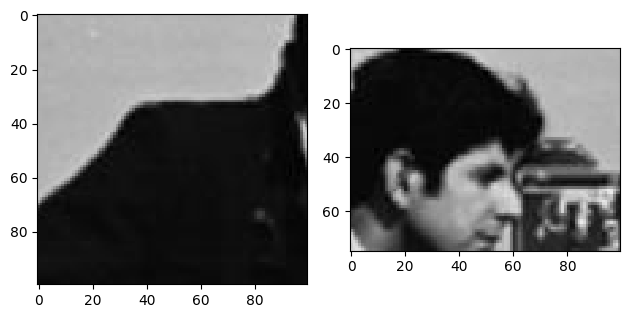

In [6]:
from matplotlib import pyplot as plt
## -- Your code here -- ##
img1=imread("camera.jpg")
center=img1[100:200, 100:200]
face=img1[75:150, 200:300]
plt.subplot(121)
imshow(center)
plt.subplot(122)
imshow(face)

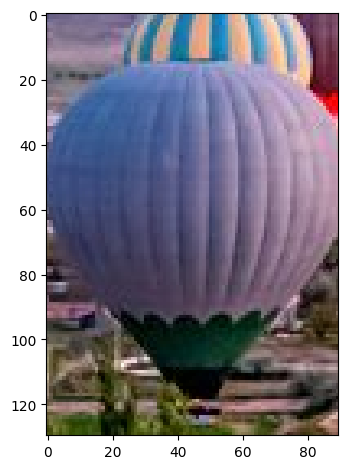

In [7]:
## -- Your code here -- ##
img2=imread("view.jpg")
single_baloon = img2[220:350,190:280]
imshow(single_baloon)

**Need more help? You can check the following videos:**

* [Image I/O](https://www.youtube.com/watch?v=rgJmji4rTpw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=1)
* [Image data type & color channels](https://www.youtube.com/watch?v=rIO1EJ--yeg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=2)

## 2. Image histograms

### Compute and plot the histogram and the normalized histogram

 Computer image analysis is about finding ways to use that "raw" information in order to extract "processed" information : what is in the image?

Image histograms are one of the simplest ways of looking at the information contained in an image. An image histogram is made by simply counting the number of pixels that have a given value. The length of the histogram will therefore correspond to the number of possible values in an image (in this case, 256).

You can use the [pyplot module](https://matplotlib.org/api/pyplot_api.html) from matplotlib to display plots & histograms.

First, lets have a look at the images as arrays:

In [8]:
from matplotlib import pyplot as plt
## -- Your code here -- ##
img1=imread("camera.jpg")
img2=imread("view.jpg")
print(img1)
print(img2)

[[156 157 158 ... 151 151 151]
 [159 158 157 ... 152 152 152]
 [161 159 157 ... 154 154 154]
 ...
 [121 123 127 ... 123 113 107]
 [121 122 123 ... 123 116 112]
 [120 124 127 ... 121 116 115]]
[[[169 179 214]
  [169 179 214]
  [170 180 215]
  ...
  [242 226 226]
  [242 226 226]
  [242 226 226]]

 [[169 179 214]
  [170 180 215]
  [170 180 215]
  ...
  [243 227 227]
  [243 227 227]
  [243 227 227]]

 [[170 180 215]
  [170 180 215]
  [171 181 216]
  ...
  [244 228 228]
  [244 228 228]
  [244 228 228]]

 ...

 [[197 162 194]
  [196 163 194]
  [196 163 194]
  ...
  [167 142 184]
  [168 143 185]
  [170 145 187]]

 [[195 161 194]
  [193 162 194]
  [193 162 193]
  ...
  [162 137 179]
  [163 138 180]
  [165 140 182]]

 [[194 163 195]
  [193 162 194]
  [192 163 193]
  ...
  [160 135 177]
  [159 134 176]
  [160 135 177]]]


As we can see, camera.jpg is a 2D array with the grayscale values of each pixel, whereas view.jpg is a 3D array with red, blue and green values ranging from 0 to 255.
We can use the pyplot module from matplotlib to display the image with more options on the plot:

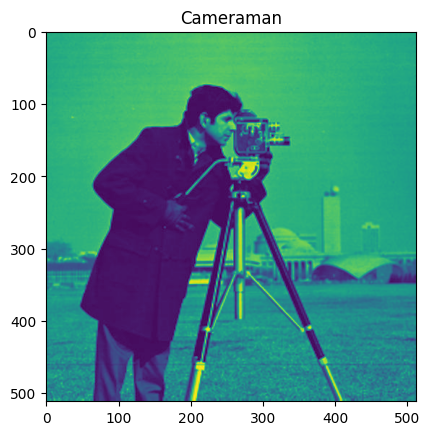

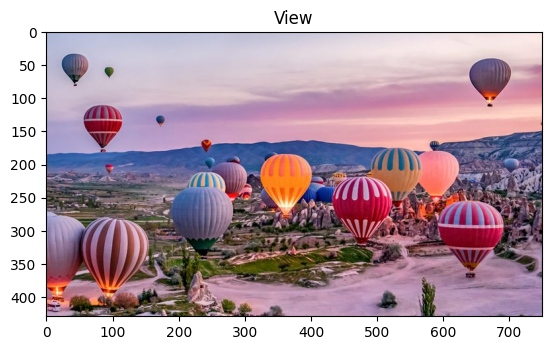

In [9]:
from matplotlib import pyplot as plt

plt.figure()
plt.imshow(img1) #when using plt.imshow, color is added automatically
plt.title("Cameraman")
plt.show()


plt.figure()
plt.imshow(img2)
plt.title("View")
plt.show()

The camera man image is not true to its original colours, why does it look like that?

When you give a grayscale image to matplotlib, it uses a default colormap that is not necessarily "grayscale" to display the information. We can force it to display the image correctly by using the cmap parameter. We can also increase the size of the figure, hide the axis, and make sure that the scale is correct for the values (0 = black, 255 = white), as by default matplotlib uses the lowest value in the image as black and the highest as white.

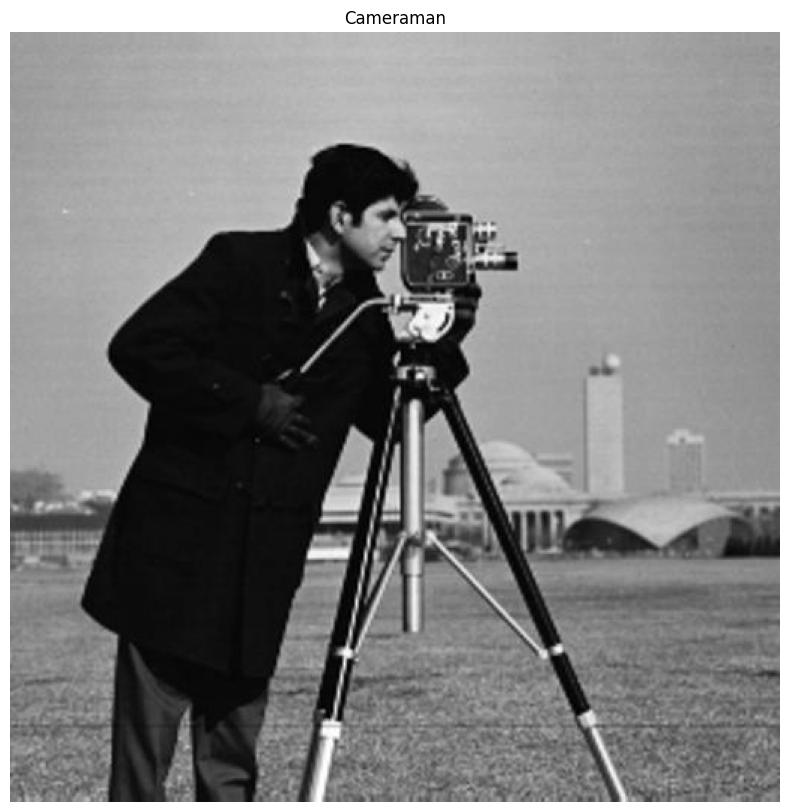

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(img1, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.title("Cameraman")
plt.axis('off')
plt.show()

### **Plotting the histogram**

Now there are different ways to get the histogram for the greyscale and RGB images.

First let's work with the greyscale image (camera.jpg). 

We can use the histogram function from numpy, but let's first try to code it ourselves.
We need to :
1. Create a 256-length vector filled with 0s to initialize the histogram
2. For each value between 0 and 255, count how many pixels in the image have that value and put it in the histogram

In [11]:
# Create 256-length vector filled with 0s
hist = np.zeros((256,)).astype('float')
#or hist = [0 for i in range(256)]
print("Empty histogram")
print(hist,len(hist))

Empty histogram
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 256


Can you use the histogram to answer the following questions ? (you don't need to code anything here)

1. What is the average gray value of the cameraman ?
1. What is the average gray value of the sky ?
1. Is there more 'cameraman' pixels than 'sky' pixels ?

In [12]:
# For each value between 0 and 255 (python's range(a,b) translates to [a,b])
for v in range(0,256):
    hist[v] = (img1==v).sum()

This line is a bit more complex, but it shows how powerful numpy can be for arrays operations. (im==v) does an element-wise comparison between the array im and the scalar v (the value we are looking at). It will create a new array of the same size as im, and fill it with True (1) wherever the pixel value of im was equal to v and with False (0) everywhere else.

Then, the sum function will sum all values of this new array. This counts the number of pixels with that particular value.

<BarContainer object of 256 artists>

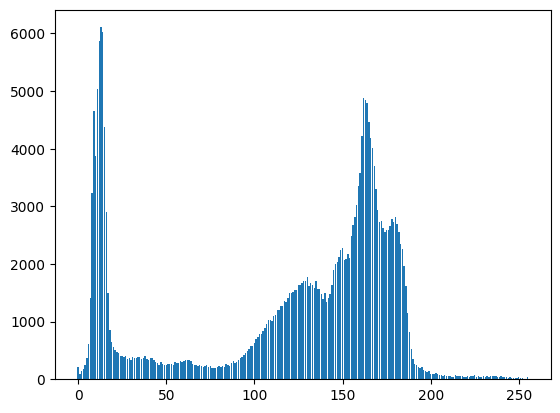

In [13]:
# Compute the histogram #

## -- Your code here -- ##
plt.figure()
plt.bar(range(256),hist) #to have barchart
#plt.plot(range(256),hist) #to have line chart


Very often, instead of using this raw histogram, we will use the **"normalized histogram"**, which looks exactly the same except that we want the sum of all values to be equal to 1 (the histogram will therefore become like a probability distribution that a pixel in the image has a given value).

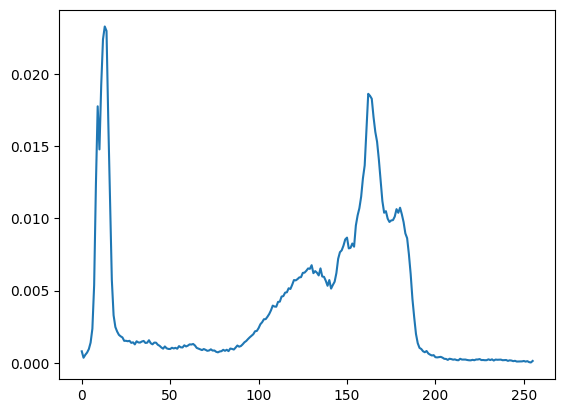

In [14]:
# Compute the histogram #
## -- Your code here -- ##
# for i in range(len(hist)):
#    hist[i]=hist[i]/(img1.shape[0]*img1.shape[1]) #divide by the number of pixels
# norm_hist=hist/(img1.shape[0]*img1.shape[1]) #np array permit to divide every cell by a number
#we can also use 
norm_hist=hist/np.sum(hist)
plt.figure()
plt.plot(norm_hist)

We can also use the histogram method from numpy, but make sure to check the documentation on how to use it properly. Numpy's histogram method expects a flat vector, not a 2D image. Also, the "bins" of the histogram have to be specified, and the way they work is not necessarily intuitive: the numpy method is generalized so that it can work on float data and not just on integers, so the bins are defined by intervals rather than the discrete sampling that we've done above. There are multiple options for defining the intervals:

If you pass an integer to the "bins" parameter, numpy will divide the image range in that number of equally spaced bins. Note that if you do that on an image that doesn't start at 0 or end at 255 (for instance, and over- or under-exposed image), it will not give you the "correct" intervals:

[10.         10.95703125 11.9140625  12.87109375 13.828125  ]


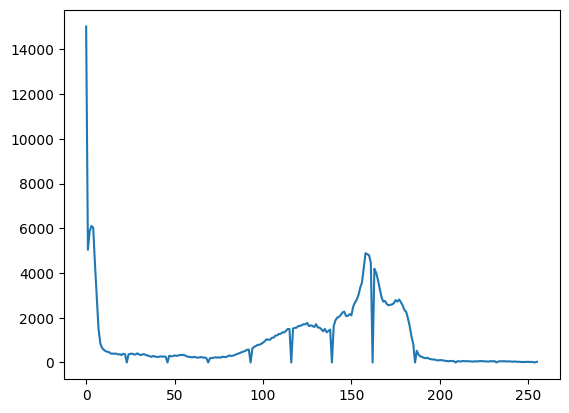

In [15]:
im2 = img1.copy()
im2 = np.maximum(im2, 10) # set all pixels with value < 10 to 10 (threshold)
hist_np, bins = np.histogram(im2.flatten(), bins=256) #flatten() turn 2D into 1D (height,width) -> (height*width)
#bins is equivalent of range but takes into account the min and max value of the image
print(bins[:5])
plt.plot(hist_np)
plt.show()
#does not give the correct result because image is thresholded 

Alternatively, you can define the intervals yourself using a range, but here you should be aware of the (sometimes unexpected) behaviour of the method. If you have a range [0, 1, 2, 3], the histogram will contain 3 bins: [0, 1], [1, 2], and [2, 3], with the last bin including the last item in the range. In that case, if we have an integer image, the last bin would contain both the im==2 and the im==3 pixels! We can see this behaviour in action if we try to use a range (256):

[0 1 2 3 4]


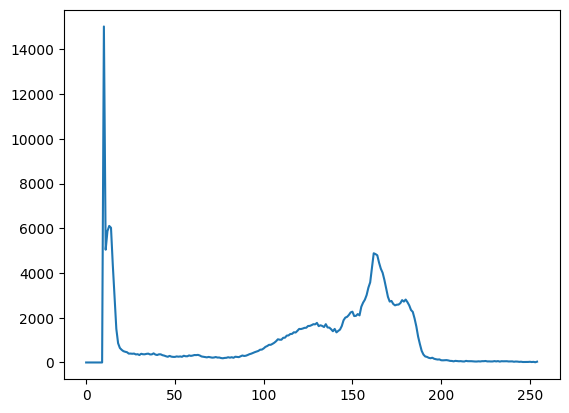

In [16]:
im2 = img1.copy()
im2 = np.maximum(im2, 10) # set all pixels with value < 10 to 10.  
hist_np, bins = np.histogram(im2.flatten(), bins=range(256))
print(bins[:5])

plt.plot(hist_np)
plt.show()

We can see that the histogram is a length-255 vector instead of 256, and if we compare to the one we computed manually, the last two bins have been put together. So if we want to reproduce the histogram we had before, we need to use a range(257), so that the last bin contains the interval [255, 256], correctly matching the im==255 bin !

[0 1 2 3 4]


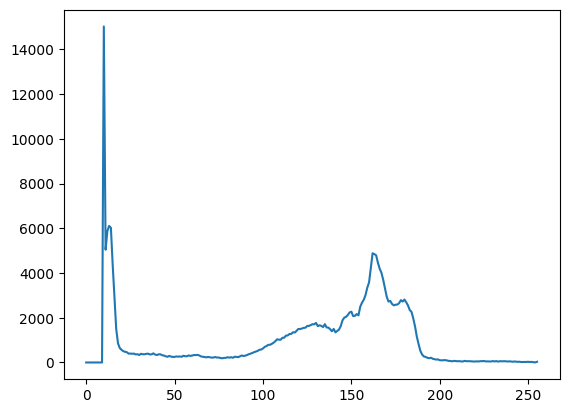

In [17]:
# Compute the histogram #
## -- Your code here -- ##
im2 = img1.copy()
im2 = np.maximum(im2, 10) # set all pixels with value < 10 to 10.  
hist_np, bins = np.histogram(im2.flatten(), bins=range(257))
print(bins[:5])

plt.plot(hist_np)
plt.show()


### **Now what can we do with this information?**

We can see that there are two great "peaks" : at around 15 (which would be almost black), and at around 160 (which is light gray). It seems like a reasonable guess to say that those values are mostly the cameraman's black coat, and the sky, which are both very homogeneous regions with a lot of pixels of the same color.

To check that, we could try to quickly segment the image using this information. Let's look at the image of all pixels between 10 and 20, and all pixels between 155 and 165:

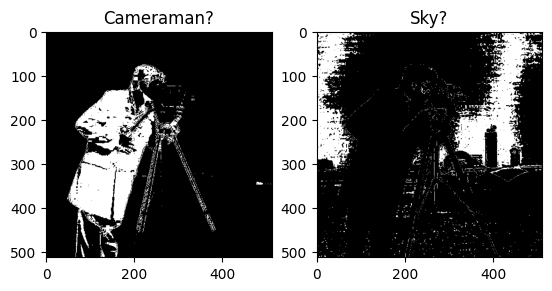

In [18]:
im=img1.copy()
dark_image = (im<=20)*(im>=10)
light_image = (im<=165)*(im>=155)

plt.figure()
plt.subplot(1,2,1) # Subplots can show multiple images on the same figure.
plt.imshow(dark_image, cmap=plt.cm.gray)
plt.title('Cameraman?')
plt.subplot(1,2,2)
plt.imshow(light_image, cmap=plt.cm.gray)
plt.title('Sky?')
plt.show()

That's not too bad, but clearly we don't have all of the sky. We can in fact see in our histogram that the peak is wider for the sky than for the cameraman. Let's try to find better values:

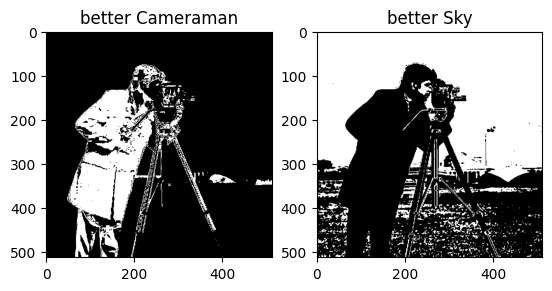

In [19]:
# Improve the threshold #
## -- Your code here -- ##
dark_image = (img1<=40)*(img1>=10)
light_image = (img1<=200)*(img1>=140)

plt.figure()
plt.subplot(1,2,1) # Subplots can show multiple images on the same figure.
plt.imshow(dark_image, cmap=plt.cm.gray)
plt.title('better Cameraman')
plt.subplot(1,2,2)
plt.imshow(light_image, cmap=plt.cm.gray)
plt.title('better Sky')
plt.show()

That's far from perfect but it's good enough for now. But with this, try to answer these questions :

The average gray value of the cameraman is around 15.
The average gray value of the sky is around 165.


The peak of the cameraman is higher than the peak of the sky, but the peak of the sky is wider. To know if there is more in one or the other, we have to compute the sum of those regions of the histogram.

In [20]:
#Calculate the number of pixels
pixels_dark = dark_image.sum()
pixels_light = light_image.sum()
print("Number of pixels in the dark area:", pixels_dark)
print("Number of pixels in the light area:", pixels_light)

Number of pixels in the dark area: 45596
Number of pixels in the light area: 132559


This seems to indicate that there are more pixels in the sky.

### **Plotting the cummulative histogram**

Cumulative histogram is a mapping that counts the cumulative number of pixel intensity values in all ofthe bins up to the current bin.
The cumulative histogram of a histogram is defined as : 

$Ci = \sum_{j=0}^i h_j$

The cumulative histogram is useful for some imageoperations that use histograms: such as Image histogram equalisation

Compute and plot the **cumulated histogram**.

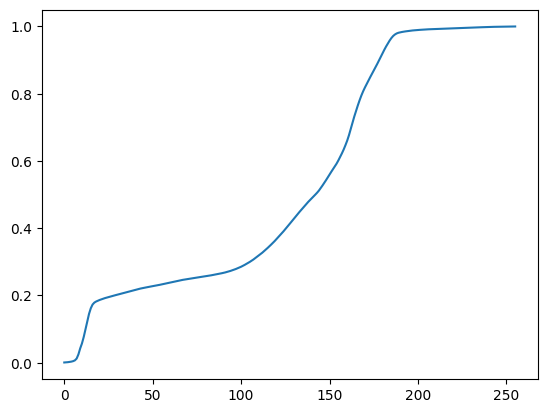

In [21]:
# Initialize cumulative histogram
## -- Your code here -- ##
cumulative_hist=np.zeros(256)#initialize
for p in range(256):
    cumulative_hist[p]=cumulative_hist[p-1]+norm_hist[p]
plt.figure()
plt.plot(cumulative_hist)
plt.show()

**Need more help? You can check the following videos:**

* [Computing a greyscale histogram](https://www.youtube.com/watch?v=g6hkHQbwB0I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=3)
* [Numpy arrays: operations, indexing, masking](https://www.youtube.com/watch?v=rPNTkrM2dZw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=4&t=253s)
* [Normalized and cumulative histograms](https://www.youtube.com/watch?v=uCgu0-KZt1o&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=5)

### Histogram Analysis of RGB image

Let's start by having a look at the immunohistochemistry image.

(512, 512, 3)


0 255


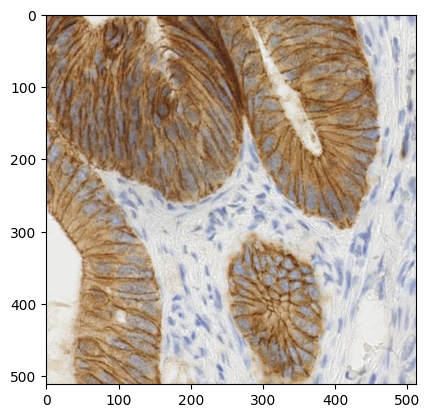

In [22]:
from skimage.data import immunohistochemistry

im = immunohistochemistry()
print(im.shape)
print(im.min(),im.max())

plt.figure()
plt.imshow(im)
plt.show()

As seen with the view.jpg image, the immunohistochemistry image also has dimensions of 512x512 pixels, with 3 8-bits channels (values between 0 and 255).

We want to isolate the "brown cells" in the RGB and HSV space. To see what we are dealing with, it would be interesting to first have a look at the histograms for the different channels. Let's start in RGB.

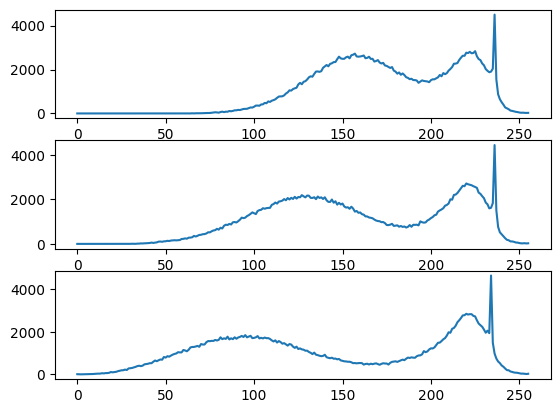

In [23]:
# Separate the RGB channel of the the image #
## -- Your code here -- ##
red_channel=im[:,:,0]
green_channel=im[:,:,1]
blue_channel=im[:,:,2]
hist_red=np.zeros(256)
hist_green=np.zeros(256)
hist_blue=np.zeros(256)
for y in range(im.shape[0]):
    for x in range(im.shape[1]):
        hist_red[red_channel[y,x]]+=1
        hist_green[green_channel[y,x]]+=1
        hist_blue[blue_channel[y,x]]+=1
plt.figure()
plt.subplot(3,1,1)
plt.plot(hist_red)
plt.subplot(3,1,2)
plt.plot(hist_green)
plt.subplot(3,1,3)
plt.plot(hist_blue)
plt.show()

We see that the 3 histograms have a similar shape, with 3 distinct peaks. 

Let's try to find out exactly where they are by finding the local maxima (that I'll define here as "higher value than anything in a size-10 neighbourhood and >= than 0")

In [24]:
# Find the peak values #
## -- Your code here -- ##
max_red=np.argmax(hist_red)
max_green=np.argmax(hist_green)
max_blue=np.argmax(hist_blue)
print("Red peak at position :",max_red,"value :",hist_red[max_red])
print("Green peak at position :",max_green,"value :",hist_green[max_green])
print("Blue peak at position :",max_blue,"value :",hist_blue[max_blue])


Red peak at position : 236 value : 4503.0
Green peak at position : 236 value : 4432.0
Blue peak at position : 234 value : 4648.0


What could a good "brown candidate" be with those values? 

If we look at the pixels at the top-left corner of the image, we have:

In [25]:

## -- Your code here -- ##
print(im[0,0])

[156 118  81]


The closest peaks to those values would be red=157, green=127, blue=95, which would be a bit brighter on average. This makes sense: the top-left corner is a darker brown than most brown pixels in the image.

Let's use [157,127,95] as our "brown" reference.

If we represent each color as a point in (R,G,B) space, we can compute an euclidian "color distance" between a pixel and this brown reference as :

$d_{colour} = \sqrt{(R-R_{ref})^2 + (G-G_{ref}) + (B-B_{ref})^2)}$

We can try to visualize this using mplot3d. Each point in the  scatterplot below is a pixel from the image, set in the RGB space. The larger point is the "reference brown".

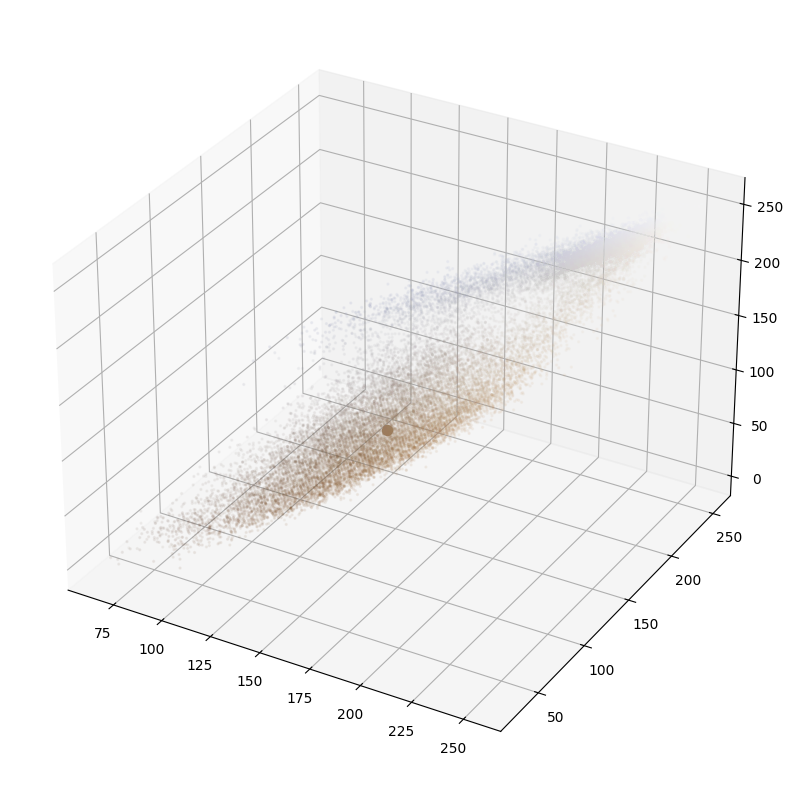

In [26]:
ref_brown = np.array([157.,127.,95.])

from mpl_toolkits.mplot3d import Axes3D
pixels = im.reshape((im.shape[0]*im.shape[1],3))[::10,:] # we take 1/10th of the pixels, because otherwise it takes too long to render.
col = np.zeros((pixels.shape[0],4)) # we create a RGBA array so that we can give transparency to the points and better see everything
col[:,:3] = pixels/255
col[:,3] = 0.1
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pixels[:,0], pixels[:,1], pixels[:,2], s=2, c=col)
ax.scatter(ref_brown[0],ref_brown[1],ref_brown[2],s=50,c=[ref_brown/255])
plt.show()

In image processing measuring and valuing a distance between two points is important. 
The Euclidean distance tools describe each cell's relationship to a source or a set of sources based on the straight-line distance.

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


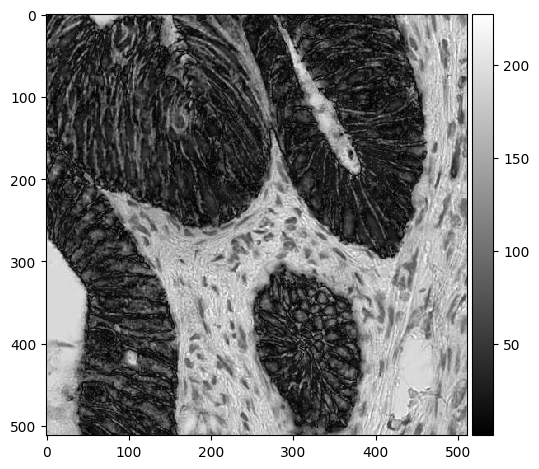

In [27]:
# Compute the Eucledian distance #
# Eucledian distance = sqrt( sum( difference^2 ) )

## -- Your code here -- ##
def euclid_distance(im,ref):
    # Calculate Euclidean distance for each pixel
    dists = np.zeros((im.shape[0],im.shape[1]), dtype='float')
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            dists[i,j] = np.sqrt(np.sum((im[i,j] - ref)**2))
    
    # Create a new image where each pixel is the Euclidean distance
    return dists
distmap = euclid_distance(im,ref_brown)
imshow(distmap, cmap=plt.cm.gray)


We can look at the histogram of the "distance" image to see if we can find a threhold that looks interesting:

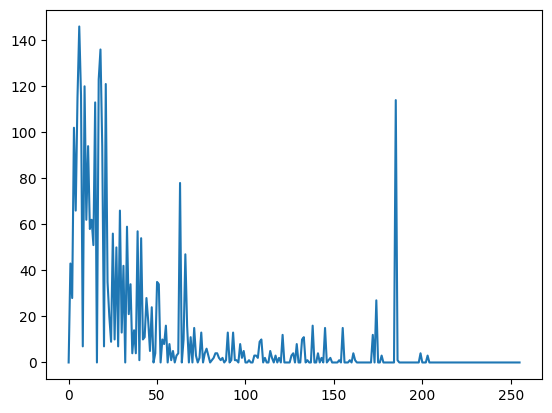

In [28]:
# Plot the histogram #
flat_img = distmap.flatten()
histo = np.zeros((256,),dtype='float')
for v in range(0,256):
    histo[v] = (flat_img==v).sum()
plt.figure()
plt.plot(histo)
plt.show()
## -- Your code here -- ##

Let's try a few possible candidates : right after the left peak (~30), somewhere in the down-slope (~50), at the low point in the middle (~120)

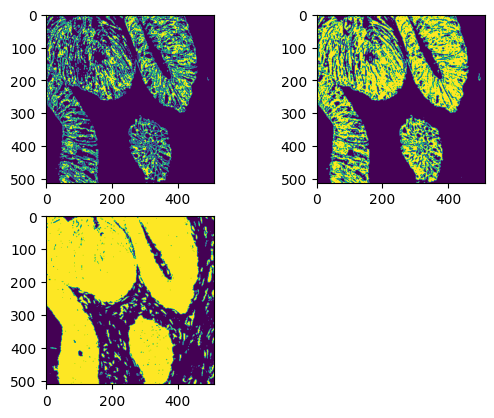

In [29]:
## -- Your code here -- ##
threshold30=distmap<=30
threshold50=distmap<=50
threshold120=distmap<=120

plt.subplot(2,2,1)
plt.imshow(threshold30)
plt.subplot(2,2,2)
plt.imshow(threshold50)
plt.subplot(2,2,3)
plt.imshow(threshold120)

The second one doesn't look bad. There is still a lot of confusion between the brown and the blue, however. In RGB space, it will be difficult to do better.

Let's now look at the hsv color-space to see if it might be easier to analyze the image there. We first need to convert the image:

(512, 512, 3)
[[[0.08222222 0.48076923 0.61176471]
  [0.08222222 0.4601227  0.63921569]
  [0.07777778 0.48076923 0.61176471]
  ...
  [0.63636364 0.2244898  0.76862745]
  [0.64035088 0.18357488 0.81176471]
  [0.63425926 0.16       0.88235294]]

 [[0.08333333 0.5106383  0.55294118]
  [0.08333333 0.5        0.56470588]
  [0.07638889 0.5106383  0.55294118]
  ...
  [0.63636364 0.21153846 0.81568627]
  [0.64035088 0.18536585 0.80392157]
  [0.63333333 0.16666667 0.82352941]]

 [[0.08333333 0.528      0.49019608]
  [0.08333333 0.5        0.51764706]
  [0.07960199 0.48550725 0.54117647]
  ...
  [0.63095238 0.19626168 0.83921569]
  [0.63425926 0.18       0.78431373]
  [0.63131313 0.16751269 0.77254902]]

 ...

 [[0.125      0.05429864 0.86666667]
  [0.125      0.05309735 0.88627451]
  [0.125      0.05128205 0.91764706]
  ...
  [0.13333333 0.02358491 0.83137255]
  [0.07142857 0.03271028 0.83921569]
  [0.07142857 0.03225806 0.85098039]]

 [[0.11666667 0.04608295 0.85098039]
  [0.11666667 0.0450450

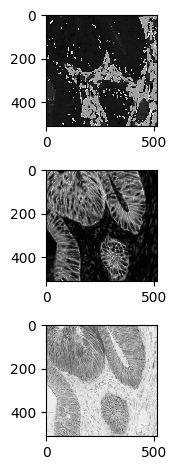

In [30]:
from skimage.color import rgb2hsv

hsv = rgb2hsv(im) #values of hue, saturation and value between 0 and 1

print(hsv.shape)
print(hsv)
# Covert to HSV-space #
plt.subplot(3,1,1)
imshow(hsv[:,:,0], cmap=plt.cm.gray)
plt.subplot(3,1,2)
imshow(hsv[:,:,1], cmap=plt.cm.gray)
plt.subplot(3,1,3)
imshow(hsv[:,:,2], cmap=plt.cm.gray)

## -- Your code here -- ##

The hue is normally expressed as an angle (in radian or degrees), but is here encoded as a float between 0 and 1. To show the histogram, we can simply multiply that number by 360 to "convert" it to degrees.

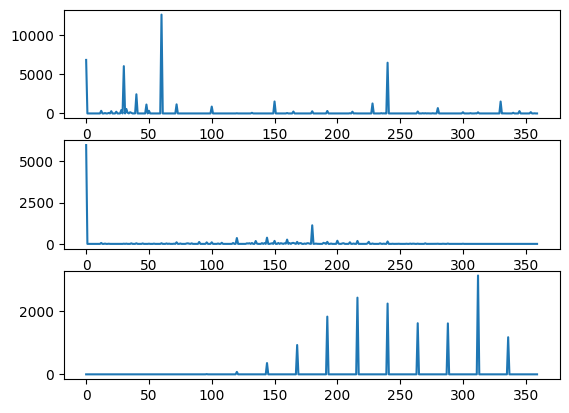

In [31]:
# Plot the histogram #


## -- Your code here -- ##
hist_hsv0 = np.zeros(360,dtype='float')
hist_hsv1 = np.zeros(360,dtype='float')
hist_hsv2 = np.zeros(360,dtype='float')
hsv_flat0 = hsv[:,:,0].flatten()*360 #multiply by 360 to have the value between 0 and 360 instead of 0 and 1
hsv_flat1 = hsv[:,:,1].flatten()*360
hsv_flat2 = hsv[:,:,2].flatten()*360

for v in range(0,360):
    hist_hsv0[v] = (hsv_flat0==v).sum()
    hist_hsv1[v] = (hsv_flat1==v).sum()
    hist_hsv2[v] = (hsv_flat2==v).sum()

plt.subplot(3,1,1)
plt.plot(hist_hsv0)
plt.subplot(3,1,2)
plt.plot(hist_hsv1)
plt.subplot(3,1,3)
plt.plot(hist_hsv2)
plt.show()

So now we have a very sharp peak in the colour space. Let's find its value, and see what the "distance map" looks like, and how it compares to the distance in RGB space.

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


[[222.57458008 222.57467768 222.57771349 ... 222.26373599 222.26598755
  222.25382329]
 [222.58177334 222.5828274  222.58666912 ... 222.25117707 222.26828946
  222.27558683]
 [222.5985402  222.60279714 222.60367816 ... 222.25372979 222.28394638
  222.29812997]
 ...
 [222.6792787  222.67167544 222.65945241 ... 222.70584073 222.74093133
  222.736216  ]
 [222.69646433 222.68876717 222.67640125 ... 222.7236319  222.74563987
  222.74299973]
 [222.68876717 222.68876717 222.68568132 ... 222.7301118  222.75078402
  222.74299973]]


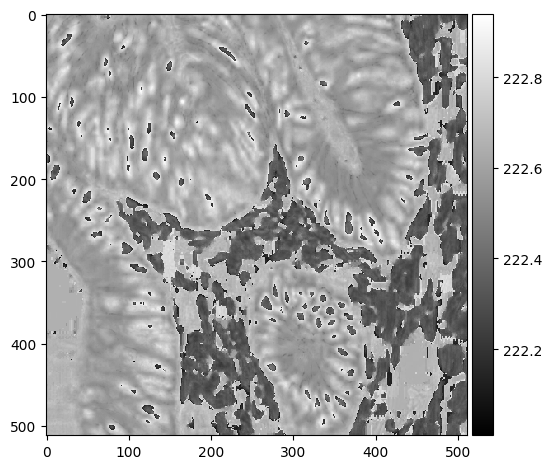

In [42]:
## -- Your code here -- ##
dmap=euclid_distance(hsv,ref_brown)
# Plot the histogram #
imshow(dmap, cmap=plt.cm.gray)
print(dmap)

We can also compare the histograms of the distances :

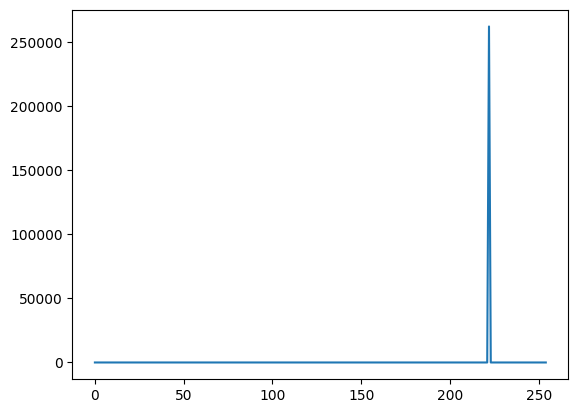

In [51]:
# Plot the histogram #


## -- Your code here -- ##
# histo_dist_hsv=np.zeros(256)
# histo = np.zeros((256,)).astype('float')
# flat_img = np.floor(dmap[:,:]).flatten()
# for v in range(0,256):
#     histo_dist_hsv[v] = (flat_img==v).sum()
histo_dist_hsv,bins=np.histogram(dmap.flatten(),bins=range(256))
plt.figure()
plt.plot(histo_dist_hsv)
plt.show()

As we can see, there is a much sharper peak in Hue space, which means that the brown pixels tend to be much "closer" together. This is normal, as in HSV space the differences in "saturation" and "value" (which can be seen as the color-to-gray scale and the light-to-dark scale) are independant from the differences in hue (the color-to-color scale).

This means that a "light brown" and a "dark brown", which can be very different in RGB space, will be very close together in Hue space. Let's try to find a good threshold for the Hue distance:

(512, 512)
[[0.08222222 0.08222222 0.07777778 ... 0.61111111 0.61111111 0.61111111]
 [0.08333333 0.08333333 0.07638889 ... 0.61111111 0.61111111 0.61111111]
 [0.08333333 0.08333333 0.07960199 ... 0.61111111 0.61111111 0.61111111]
 ...
 [0.125      0.125      0.125      ... 0.13333333 0.07142857 0.07142857]
 [0.11666667 0.11666667 0.11666667 ... 0.11111111 0.07142857 0.0625    ]
 [0.11666667 0.11666667 0.11666667 ... 0.11111111 0.0625     0.0625    ]]


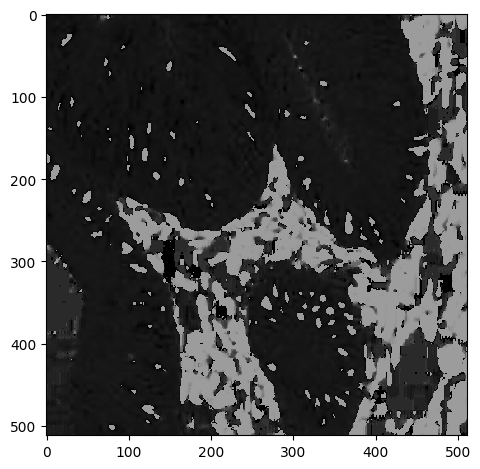

In [59]:
## -- Your code here -- ##
def threshold(img_channel, thres, is_hsv = False):
    # if hsv -> must divide by 360 to get in [0;1] hsv interval
    threshold = thres/360 if is_hsv else thres

    img_threshold=np.minimum(img_channel,threshold)
    print(img_threshold.shape)
    print(img_threshold)
    imshow(img_threshold, cmap=plt.cm.gray)
threshold(hsv[:,:,0], 220, is_hsv = True)

We can see that there are still some problems, with pixels from the background which are seen as brown. That's because those pixels are fully saturated (completely gray), which means that their hue is mostly random. We can easily get rid of them by adding a threshold on the the saturation channel:

(512, 512)
[[0.41666667 0.41666667 0.41666667 ... 0.2244898  0.18357488 0.16      ]
 [0.41666667 0.41666667 0.41666667 ... 0.21153846 0.18536585 0.16666667]
 [0.41666667 0.41666667 0.41666667 ... 0.19626168 0.18       0.16751269]
 ...
 [0.05429864 0.05309735 0.05128205 ... 0.02358491 0.03271028 0.03225806]
 [0.04608295 0.04504505 0.04347826 ... 0.01401869 0.03317536 0.0372093 ]
 [0.04504505 0.04504505 0.04464286 ... 0.01428571 0.03809524 0.0372093 ]]


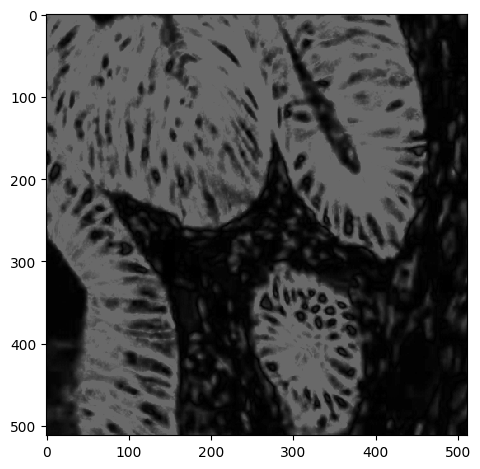

In [58]:
## -- Your code here -- ##
threshold(hsv[:,:,1], 220, is_hsv = True)

To better visualize those results, we can use the segmentation as a mask to remove all non-brown pixels and compare the HSV and RGB images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


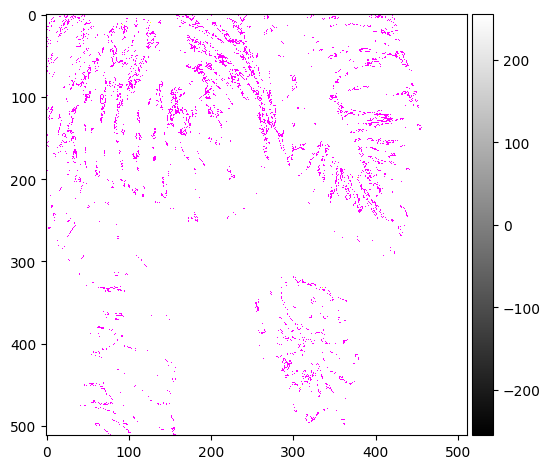

In [60]:
# Calculate the mask #
mask_fun = lambda img,i : (img[:,:,i]*360 > 210) * (img[:,:,i]*360 < 230)
masked_hsv = hsv.copy()
masked_hsv[:,:,1] = mask_fun(hsv.copy(),1)*255

compare = im.copy() - masked_hsv

imshow(compare, cmap=plt.cm.gray)

## -- Your code here -- ##

Unsurprisingly, the HSV results are much better, as the color information is encoded in a way that makes it easier to use. RGB color space is a good way to encode the information for display (as it directly relates to the way the screen will show it), but isn't always very practical for analysis.

**Need more help? You can check the following videos:**

* [RGB vs HSV](https://www.youtube.com/watch?v=oVpSTZtZQNM&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=10)
* [Distances: image space and colour space](https://www.youtube.com/watch?v=f6aJJldc38E&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=11)
* [Creating a Magic Wand](https://www.youtube.com/watch?v=Aw--_cJ7o5I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=12)

## 3. Image entropy

The "entropy" of a signal, in information theory, can generally be interpreted as the "number of bits required to encode the signal". It is a measure of the "amount of information" contained in the signal. Intuitively, a signal with a very narrow distribution (all values are close to each other) will have a very low entropy, while a signal with a wide distribution (the values are evenly distributed) will have a higher entropy.


### **1. Compute the image entropy of the camera.jpg image.** 

The image entropy is given by:
           
$e = - \sum_{g=0}^N p(g) \log_2(p(g))$ 

where $p(g)$ is the probability that a pixel has the grayscale value g, and N is the number of possible grayscale values. Note that $p(g)$ is directly given by the normalized histogram.

The entropy is generally computed using the base 2 logarithm, so that we can give it the information theory interpretation of "number of bits per element" necessary to encode the data

In [80]:
import numpy as np
from skimage.io import imread,imsave,imshow
from matplotlib import pyplot as plt


#Compute the entropy #


## -- Your code here -- ##
def norm_hist(im):
    hist=np.zeros(256)
    for v in range(256):
        hist[v]=(im==v).sum()
    total_pix=hist.sum()
    norm_hist=hist/total_pix #np array permit to divide every cell by a number
    return norm_hist
def entropy(im):
    #compute normalized histogram -> p(g)
    # ## -- Your code here -- ##
    p=norm_hist(im)
    #compute the entropy e
    ## -- Your code here -- ##
    entropy=0
    for g in range(256):
        if p[g]>0:
            entropy+=p[g]*np.log2(p[g])
    return -(entropy)

print(entropy(img1))

7.065452040742872


The entropy will be higher when you have an even distribution of grayscale vale, and lower if the image is more homogeneous. We can look at the extreme cases of a completely random image, and of a uniform image:

Entropy of a random image : 7.975530598458791
Entropy of a uniform image : -0.0
Entropy of a uniform image : -0.0


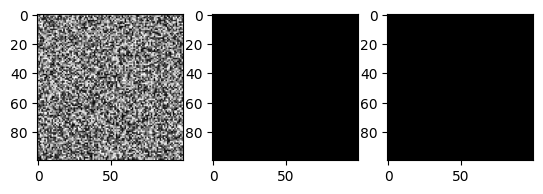

In [93]:
A = (np.random.random((100,100))*255).astype('uint8')
B = np.zeros((100,100))
C = np.ones((100,100))*255
print("Entropy of a random image :", entropy(A))
print("Entropy of a uniform image :", entropy(B))
print("Entropy of a uniform image :", entropy(C))
plt.subplot(1,3,1)
plt.imshow(A, cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(B, cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(C, cmap=plt.cm.gray)
plt.show()

A truly uniform distribution would have an entropy of 8 (which corresponds to the number of bits per pixels necessary to encode the information), while a uniform image has an entropy of 0.

Now let's apply this to the cameraman:

Entropy of camera.jpg : 7.065452040742872


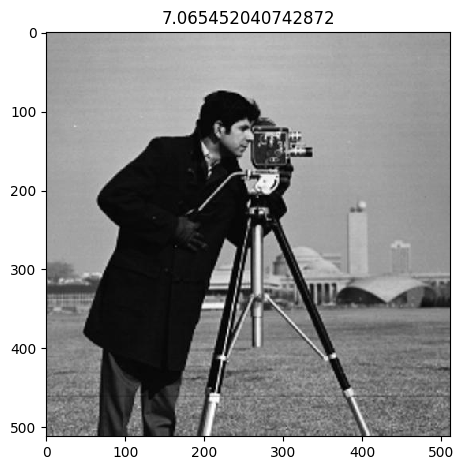

In [83]:
#compute the entropy for camera.jpg
    ## -- Your code here -- ##
print("Entropy of camera.jpg :", entropy(img1))
plt.figure()
plt.title(entropy(img1))
imshow(img1)

### **2. What is the entropy of a shuffled version of the cameraman?**

As the entropy is computed on the histogram of the image, it doesn't take into account any sort of spatial information. If we shuffle the cameraman image randomly, it may seems like we produce a "random" image, but the entropy is exactly the same:

In [77]:
# It's easier to shuffle the image if it's first flattened in 1D

## -- Your code here -- ##
flat_img1=img1.flatten()
np.random.shuffle(flat_img1)
entropy_shuffled=entropy(flat_img1)
print("Entropy of shuffled camera.jpg :", entropy_shuffled)

Entropy of shuffled camera.jpg : 7.065452003809883


**Need more help? You can check the following videos:**

* [Computing the image entropy](https://www.youtube.com/watch?v=L2VtGt2FsRQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=6)

## 4. Image compression

Using the code below as a starting point:

- **Decompose an image** by recursively subsampling its dimensions and computing the remainders, such that each level of recursion performs the following operation:

![ ](PyramidCompression.png)



Subsampling is a way of reducing the size of an image. 

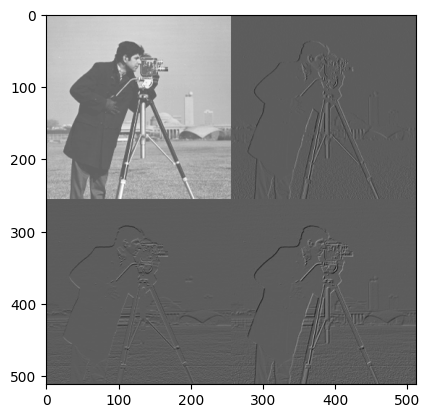

In [108]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread

def split(im):
    a = im[::2,::2] #we take a subsample every 2 pixels
    b = im[::2,1::2]-a #we substract the value of the pixel a to the pixel b (like the formula)
    c = im[1::2,::2]-a
    d = im[1::2,1::2]-a
    #mark
    im2=im.copy()
    midy=im2.shape[0]//2
    midx=im2.shape[1]//2
    im2[:midy,:midx]=a
    im2[:midy,midx:]=b
    im2[midy:,:midx]=c
    im2[midy:,midx:]=d
    return im2
    #we can also do this instead of where it is marked
    # R = np.vstack((np.hstack((a,b)),np.hstack((c,d))))
    # return R

im = imread('camera.jpg').astype("int16") # cast the camera image as a signed integer to avoid overflow
s2 = split(im)

plt.figure()
plt.imshow(s2,cmap=cm.gray)
# interpolation='nearest' -> don't try to interpolate values between pixels if the size of the display is different from the size of the image
# cmap=cm.gray -> display in grayscale
# vmin=-255 -> set "black" as -255
# vmax=255 -> set "white" as 255
# plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
# plt.colorbar()

**Compute how the image entropy evolves** with regards to the level of decomposition

entropy of camera.jpg : 7.065452040742872
entropy of split camera.jpg : 5.195021841138379


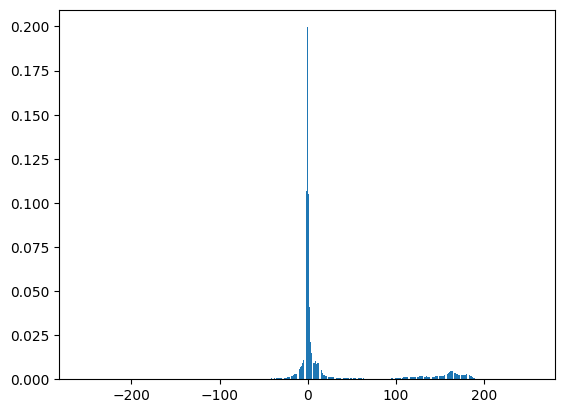

After splitting recursively,the entropy is 3.346722744534718


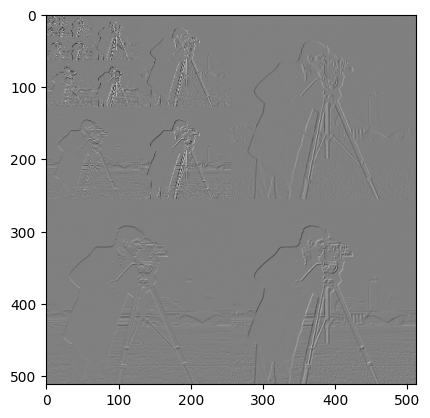

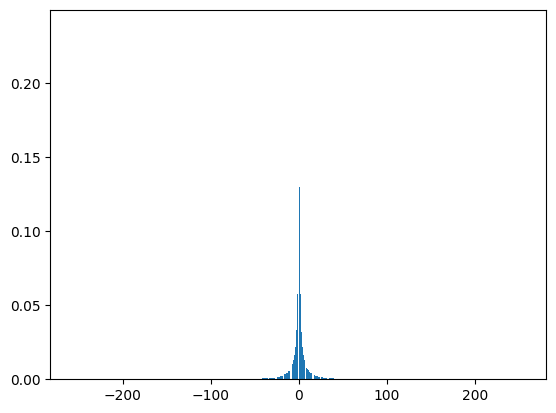

In [116]:
#entropy will tend to be higher when we have a flatter histogram, and it will be lower when we have narrow peaks
#the idea here is that pixels that are very close together in the image will tend to have very similar value; borders not included


# -- Your code here -- #
print("entropy of camera.jpg :", entropy(im))
print("entropy of split camera.jpg :", entropy(s2))
h,bins = np.histogram(s2,bins=range(-256,257),density=True)
plt.figure()
plt.bar(bins[:-1],h)
plt.show()
def split(im):
    if im.shape[0]%2 !=0 or im.shape[1]%2!=0:
        return im
    a = im[::2,::2] #we take a subsample every 2 pixels
    b = im[::2,1::2]-a #we substract the value of the pixel a to the pixel b (like the formula)
    c = im[1::2,::2]-a
    d = im[1::2,1::2]-a
    R = np.vstack((np.hstack((split(a),b)),np.hstack((c,d))))
    return R
split_recursive=split(im)
print("After splitting recursively,the entropy is",entropy(split_recursive))
plt.figure()
plt.imshow(split_recursive,cmap=cm.gray)
plt.show()
h,bins = np.histogram(split_recursive,bins=range(-256,257),density=True)
plt.figure()
plt.bar(bins[:-1],h)
plt.show()

We can easily observe that the entropy has gone down quite a bit, which was our goal, without losing any information

**Rebuild the original image** from the pyramid (allowing the selection the level of recursion)

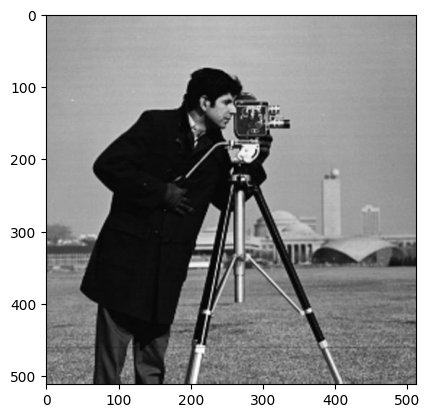

In [117]:
# -- Your code here -- #
def rebuild(im):
    if(im.shape[0]%2!=0 or im.shape[1]%2!=0):
        return im
    midy=im.shape[0]//2
    midx=im.shape[1]//2
    a=rebuild(im[:midy,:midx])
    b=im[:midy,midx:]
    c=im[midy:,:midx]
    d=im[midy:,midx:]

    im2=im.copy()
    im2[::2,::2]=a
    im2[::2,1::2]=b+a
    im2[1::2,::2]=c+a
    im2[1::2,1::2]=d+a
    return im2
reconstruct=rebuild(split_recursive)
plt.figure()
plt.imshow(reconstruct,cmap=cm.gray)
plt.show()

**Need more help? You can check the following videos:**

* [Subsampling and rescaling](https://www.youtube.com/watch?v=rYNUby5bIlA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=7)
* [Pyramid compression](https://www.youtube.com/watch?v=yrsyF8T5OAU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=8)

## 5. Co-occurrence matrix

While the histogram of an image is independent of the position of the pixels, the co-occurrence matrix gives us information about their spatial distribution.

A co-occurrence matrix is computed for a given displacement, looking at the pair of values spatially separated by that displacement. The co-occurrence matrix is a square matrix, its size given by the number of possible values that a pixels can take in the image.

1. Compute de [cooccurrence matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) for a chosen displacement $(\Delta x,\Delta y)$ (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix) in scikit-image)
1. What is the entropy of the cooccurrence matrix ?
1. How does this entropy evolve if we increase the displacement ?

In [ ]:
from skimage.feature import graycomatrix
from skimage.io import imread
import numpy as np

# -- Your code here -- #

As we can see, short distances have most of the values of the co-occurence matrix close to the diagonal. This means that pixels that are close spatially tend to also have similar values. If we look at a longer distance, we will see a flatter distribution, and therefore a higher entropy.

**Need more help? You can check the following videos:**

* [Grayscale co-occurence matrix](https://www.youtube.com/watch?v=cq0Br3zB2AU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=9)

# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

![ ](ex_wm.jpg)

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image


In [ ]:
# -- Your code here -- #